# COMP4318/COMP5318 Assignment 2

In this template, we have provided data loading code and section headings to help structure your notebook. Please refer to the assignment specification pdf to guide the content of your notebook and report.


(Add SIDs here)

# Setup

In [2]:
# Please include your imports in this cell
import numpy as np
import matplotlib.pyplot as plt

# Data loading, exploration, and preprocessing

## Data loading

In [3]:
# Load data files assuming Assignment2Data folder 
# is present in the same directory as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13673, 28, 28, 3)
(13673,)
(3419, 28, 28, 3)
(3419,)


## Data exploration

Number of classes:  8


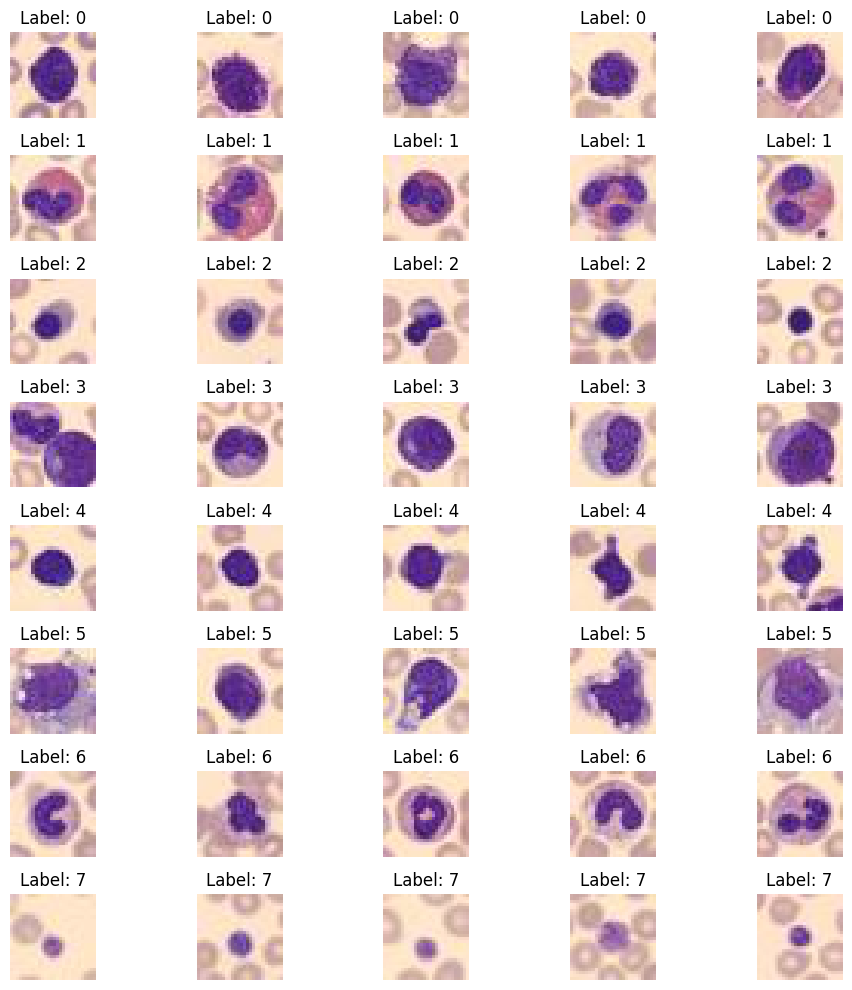

In [4]:
unique_labels_train = np.unique(y_train)
num_classes_train = len(unique_labels_train)
print("Number of classes: ", num_classes_train)

num_classes = 8

image_indices = []
for i in range(num_classes):
    indices = np.where(y_train == i)[0][:5]
    image_indices.extend(indices)

fig = plt.figure(figsize=(10, 10))  # Increase the figure size

for i, index in enumerate(image_indices):
    ax = fig.add_subplot(8, 5, i+1)
    ax.imshow(X_train[index])
    ax.set_title(f'Label: {y_train[index]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

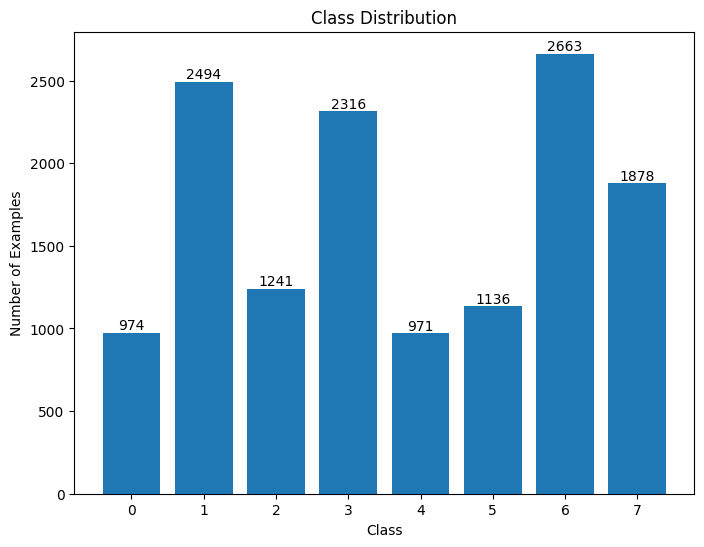

In [5]:
# Calculate class distribution
class_counts = np.bincount(y_train)
num_classes = len(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(range(num_classes), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.title('Class Distribution')
plt.xticks(range(num_classes))

# Display number of examples above each bar
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [6]:
from scipy.ndimage.measurements import center_of_mass

# Calculate center of mass for each image
center_of_mass_list = []
for i in range(num_classes_train):
    class_indices = np.where(y_train == i)[0]
    class_images = X_train[class_indices]
    class_com = np.mean([center_of_mass(image) for image in class_images], axis=0)
    center_of_mass_list.append(class_com)

# Calculate average distance from center of mass to image center
image_center = (X_train.shape[1] // 2, X_train.shape[2] // 2, X_train.shape[3] // 2)
average_distances = [np.linalg.norm(class_com - image_center) for class_com in center_of_mass_list]

# Display average distances
for i in range(num_classes_train):
    print(f"Average distance for class {i}: {average_distances[i]}")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4020\3749662807.py:1: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import center_of_mass


Average distance for class 0: 0.8611261050617396
Average distance for class 1: 0.8419120160462501
Average distance for class 2: 0.7741333275455761
Average distance for class 3: 0.9068411515031581
Average distance for class 4: 0.7727474198891529
Average distance for class 5: 0.8292497869644676
Average distance for class 6: 0.81600813678064
Average distance for class 7: 0.7478272341749216


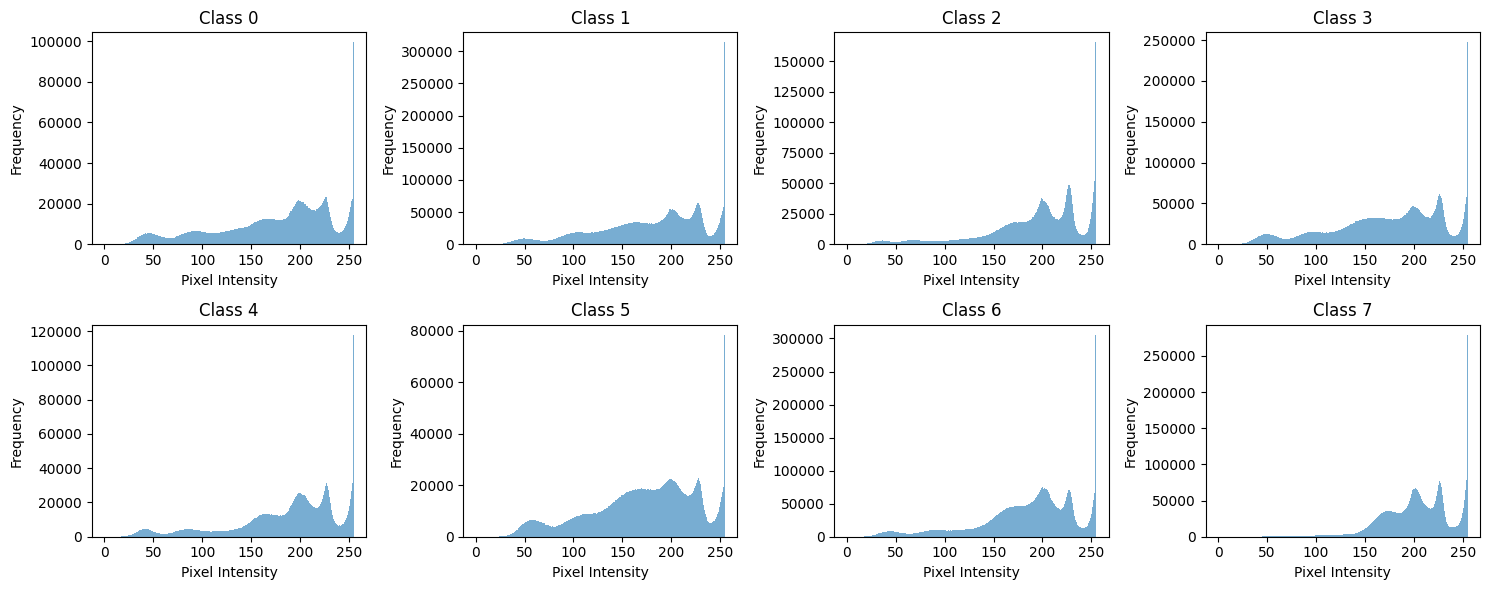

In [7]:
# Calculate the number of rows and columns for subplots
num_rows = (num_classes + 3) // 4  # Round up to the nearest multiple of 4
num_cols = min(num_classes, 4)

# Plot pixel intensity distribution for each class
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
fig.subplots_adjust(hspace=0.5)

for i in range(num_classes):
    class_indices = np.where(y_train == i)[0]
    class_images = X_train[class_indices]

    # Flatten images and concatenate into a single array
    class_pixel_values = class_images.flatten()

    # Determine the subplot location
    row = i // num_cols
    col = i % num_cols

    # Plot histogram in the corresponding subplot
    axes[row, col].hist(class_pixel_values, bins=256, range=(0, 255), alpha=0.6)
    axes[row, col].set_xlabel('Pixel Intensity')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Class {i}')

# Hide any extra subplots
if num_classes % 4 != 0:
    for i in range(num_classes, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix between classes
similarity_matrix = cosine_similarity(X_train.reshape(X_train.shape[0], -1))

# Display similarity matrix as a table
class_names = ['0', '1', '2', '3', '4', '5', '6', '7']  # Replace with your class names

# Print table header
print("Similarity Matrix:")
header = "\t".join(class_names)
print(f"\t{header}")

# Print similarity values
for i in range(num_classes):
    row = [f"{similarity_matrix[i, j]:.3f}" for j in range(num_classes)]
    row_str = "\t".join(row)
    print(f"{class_names[i]}\t{row_str}")

Similarity Matrix:
	0	1	2	3	4	5	6	7
0	1.000	0.928	0.967	0.990	0.968	0.972	0.968	0.963
1	0.928	1.000	0.930	0.917	0.921	0.926	0.920	0.920
2	0.967	0.930	1.000	0.960	0.969	0.977	0.975	0.976
3	0.990	0.917	0.960	1.000	0.961	0.964	0.969	0.955
4	0.968	0.921	0.969	0.961	1.000	0.976	0.973	0.973
5	0.972	0.926	0.977	0.964	0.976	1.000	0.974	0.975
6	0.968	0.920	0.975	0.969	0.973	0.974	1.000	0.973
7	0.963	0.920	0.976	0.955	0.973	0.975	0.973	1.000


## Preprocessing

## Examples of preprocessed data
Please print/display some examples of your preprocessed data here. 

# Algorithm design and setup

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2

# Hyperparameter tuning

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2

# Final Models

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2